In [6]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 22
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42

COLORS = {
    # batches
    "sst2_default_batch_128": "black",
    "sst2_raking_batch_128": "tab:green",
    "sst2_default_batch_32": "black",
    "sst2_raking_batch_32": "tab:green",
    # bins
    # factor
}

RES_DIR = "../logs/sst2"

In [8]:
def create_plot(exp_names, seed=0, res_dir=RES_DIR, steps=list(range(500, 5001, 500)), title="SST-2", linestyles=None, filename=None):
    losses = {name: {"train_loss": [], "validation_loss": [], "train_accuracy": [], "validation_accuracy": []} for name in exp_names}
    for name in exp_names:
        for i in steps:
            with open(os.path.join(res_dir, f'{name}/{seed}/step_{i}.json'), "r") as f:
                res = json.load(f)
                for key in res:
                    losses[name][key].append(res[key])

    sns.set_style("whitegrid")

    fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharey="row")

    if not linestyles:
        linestyles = ["solid"] * len(exp_names)
    else:
        assert len(linestyles) == len(exp_names)

    for i, name in enumerate(exp_names):
        x = steps

        y = np.array(losses[name]['train_loss'])
        ax[0, 0].plot(x, y, label=exp_names[name], color=COLORS[name], linestyle=linestyles[i])
        ax[0, 0].set_ylabel('Train Loss')
        ax[0, 0].set_yscale("log")

        y = np.array(losses[name]['validation_loss'])
        ax[0, 1].plot(x, y, label=exp_names[name], color=COLORS[name], linestyle=linestyles[i])
        ax[0, 1].set_ylabel('Validation Loss')
        ax[0, 1].set_yscale("log")

        y = np.array(losses[name]['train_accuracy'])
        ax[1, 0].plot(x, y, label=exp_names[name], color=COLORS[name], linestyle=linestyles[i])
        ax[1, 0].set_ylabel('Train Accuracy')
        ax[1, 0].set_xlabel('Training Iterations')

        y = np.array(losses[name]['validation_accuracy'])
        ax[1, 1].plot(x, y, label=exp_names[name], color=COLORS[name], linestyle=linestyles[i])
        ax[1, 1].set_ylabel('Validation Accuracy')
        ax[1, 1].set_xlabel('Training Iterations')

    ax[1, 1].legend()
    fig.suptitle(f"{title} Classification Performance", fontsize=20, y=0.95)
    if filename:
        plt.savefig(f"figures/{filename}", bbox_inches='tight')
    plt.show()

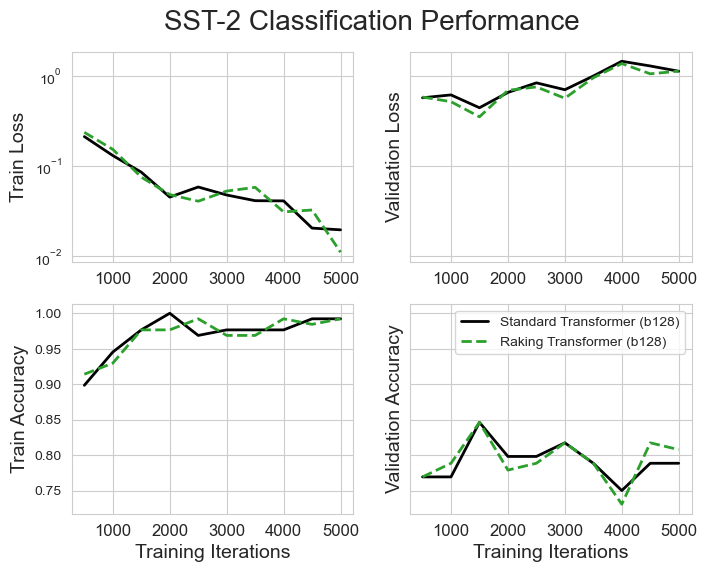

In [9]:
exp_names = {
    "sst2_default_batch_128": "Standard Transformer (b128)",
    "sst2_raking_batch_128":  "Raking Transformer (b128)"
}

create_plot(exp_names, linestyles=["solid", "dashed"], filename="sst2_b128.pdf")

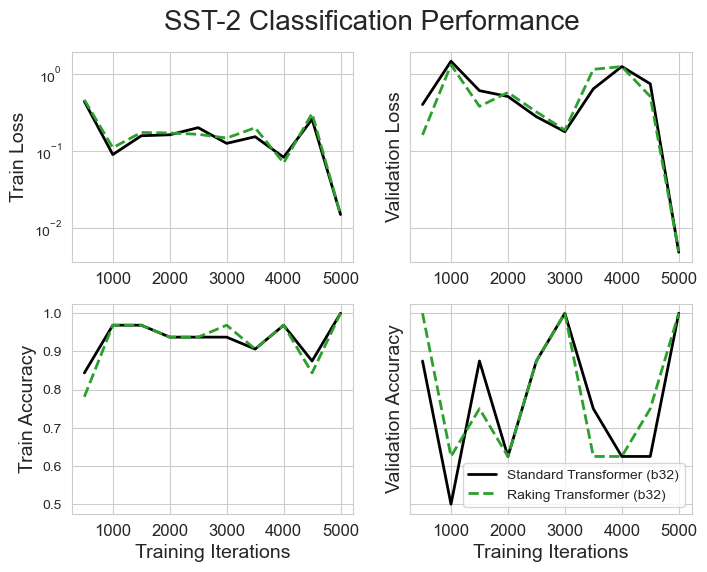

In [10]:
exp_names = {
    "sst2_default_batch_32": "Standard Transformer (b32)",
    "sst2_raking_batch_32":  "Raking Transformer (b32)"
}

create_plot(exp_names, linestyles=["solid", "dashed"], filename="sst2_b32.pdf")